# 01 - Exploratory Data Analysis (EDA)

## Description

- Investigate the dataset to identify data types, missing values, duplicates, outliers, or other
quality issues.
- Provide descriptive statistics and visualizations (histograms, box plots, correlation matrices,
etc.) that showcase key relationships or anomalies in the data.

## Initialization

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
data_path = "../data"
survey_result_path = f"{data_path}/2024_survey_results_public.csv"
survey_schema_path = f"{data_path}/2024_survey_results_schema.csv"

# Functions
def get_unique_values(df, max_unique_value=10):
    """
    Store unique values for columns with less than 10 unique values
    """
    unique_values_dict = {}
    for column in df.columns:
        if df[column].nunique() < max_unique_value:
            unique_values_dict[column] = df[column].unique()
    return unique_values_dict

def print_unique_values(unique_values_dict):
    """
    Print the unique values for each column.
    """
    for column, values in unique_values_dict.items():
        print(f"Column: {column}")
        print("Unique values:", values)
        print()

In [3]:
# Dataset load
survey_result_df = pd.read_csv(survey_result_path)
survey_result_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Dataset exploration

In [4]:
print("Dataset dimensions:", survey_result_df.shape)

Dataset dimensions: (65437, 114)


In [20]:
test =survey_result_df.columns
for i in test:
    print(i)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [24]:
survey_result_df['CompTotal'].dropna()

72       2040000.0
374        28000.0
379        85000.0
385        50000.0
389       110000.0
           ...    
65396      36000.0
65401      40000.0
65408      61000.0
65412      58000.0
65431      55000.0
Name: CompTotal, Length: 33740, dtype: float64

In [25]:
survey_result_df['Currency'].dropna()

72            PKR\tPakistani rupee
353              EUR European Euro
367      USD\tUnited States dollar
374              EUR European Euro
377            BRL\tBrazilian real
                   ...            
65408            EUR European Euro
65412            EUR European Euro
65428            INR\tIndian rupee
65431            EUR European Euro
65435            EUR European Euro
Name: Currency, Length: 46684, dtype: object

In [6]:
# Initial inspection
print(survey_result_df.info())
print(survey_result_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.3432

In [7]:
# Get unique values for columns with less than 10 unique values
unique_values_dict = get_unique_values(survey_result_df)

# Print the unique values
print_unique_values(unique_values_dict)

Column: MainBranch
Unique values: ['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']

Column: Age
Unique values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']

Column: RemoteWork
Unique values: ['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']

Column: Check
Unique values: ['Apples']

Column: EdLevel
Unique values: ['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Somethin

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


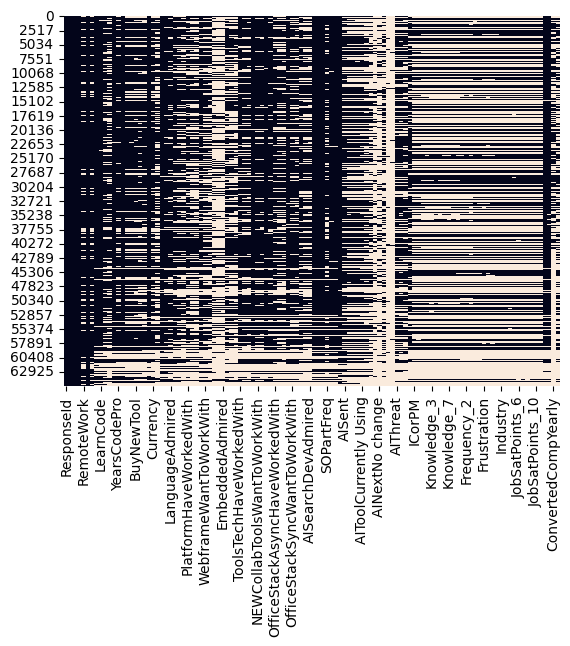

In [8]:
# Identify missing values
print(survey_result_df.isnull().sum())

# Visualize missing values
sns.heatmap(survey_result_df.isnull(), cbar=False)
plt.show()

0


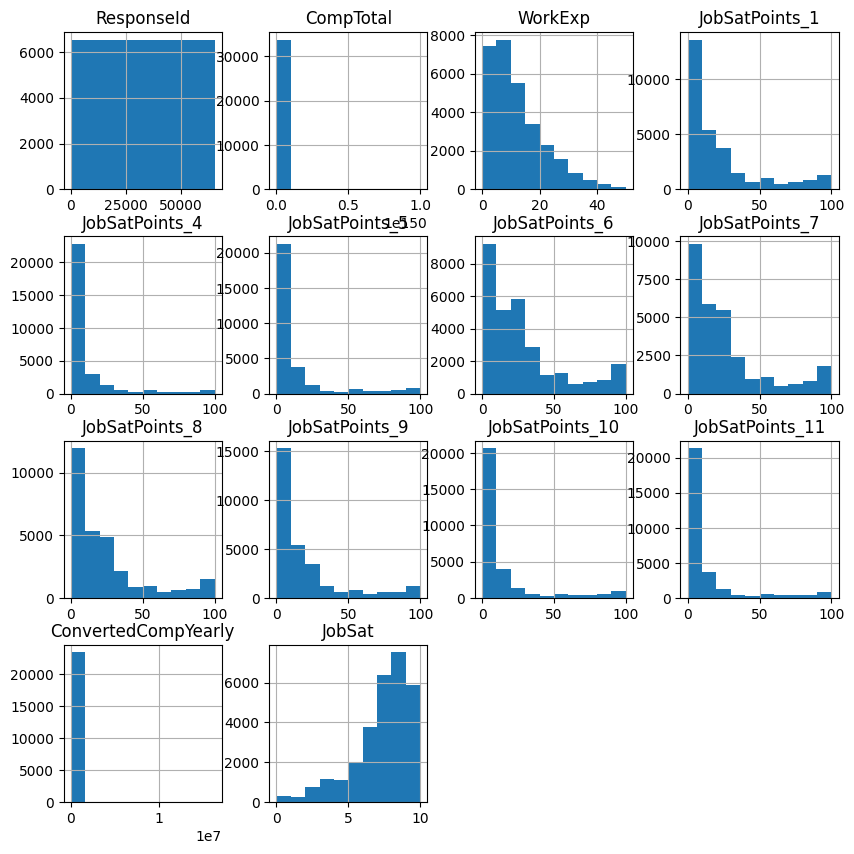

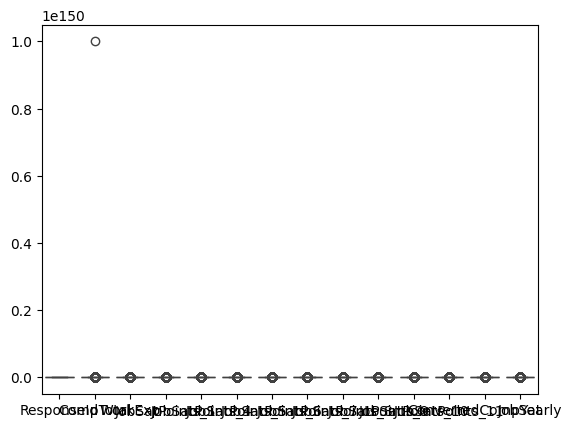

In [9]:
# Identify duplicates
print(survey_result_df.duplicated().sum())

# Data visualization
survey_result_df.hist(figsize=(10, 10))
plt.show()

sns.boxplot(data=survey_result_df)
plt.show()

In [10]:
def identify_column_types(df):
    """
    Identify numerical, categorical, and free text columns in a pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    tuple: A tuple containing two dictionaries.
        - column_types: A dictionary with keys 'numerical', 'categorical', and 'free_text', containing lists of column names.
        - column_details: A dictionary with keys as column names and values as another dictionary containing 'uniqueness_ratio' and 'unique_values'.
    """
    column_types = {
        'numerical': [],
        'categorical': [],
        'free_text': []
    }

    column_details = {}

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    column_types['numerical'] = numerical_cols.tolist()

    # Identify potential categorical and free text columns
    object_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in object_cols:
        # Drop NA values before calculating uniqueness ratio and unique values
        col_data = df[col].dropna()
        unique_values = col_data.unique()
        uniqueness_ratio = len(unique_values) / len(col_data)
        column_details[col] = {
            'uniqueness_ratio': uniqueness_ratio,
            'unique_values': unique_values,
            'number_unique_value': len(unique_values),
            'number_non_null_value': len(col_data)
        }
        if uniqueness_ratio < 0.1:  # Threshold for considering a column as categorical
            column_types['categorical'].append(col)
        else:
            column_types['free_text'].append(col)

    # Calculate uniqueness ratio and unique values for numerical columns
    for col in numerical_cols:
        # Drop NA values before calculating uniqueness ratio and unique values
        col_data = df[col].dropna()
        unique_values = col_data.unique()
        uniqueness_ratio = len(unique_values) / len(col_data)
        column_details[col] = {
            'uniqueness_ratio': uniqueness_ratio,
            'unique_values': unique_values,
            'number_unique_value': len(unique_values),
            'number_non_null_value': len(col_data)
        }

    return column_types, column_details


In [11]:
column_types, column_details = identify_column_types(survey_result_df)

# Print the number of columns in each category and the column names
for category, columns in column_types.items():
    print(f"{category.capitalize()} Columns ({len(columns)}): {columns}")

# Print the uniqueness ratio and unique values only for categorical columns
for column in column_types['categorical']:
    details = column_details[column]
    print(f"\nColumn: {column}")
    print(f"Uniqueness Ratio: {details['uniqueness_ratio']:.2f}")
    if len(details['unique_values']) > 100:
        print("Unique Values:", details['unique_values'])
    print("# Unique Values:", details['number_unique_value'])
    print("# Non Null Values:", details['number_non_null_value'])

Numerical Columns (14): ['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']
Categorical Columns (76): ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'PlatformAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISen

In [27]:
column_details['Currency']

{'uniqueness_ratio': 0.0030417273584097335,
 'unique_values': array(['PKR\tPakistani rupee', 'EUR European Euro',
        'USD\tUnited States dollar', 'BRL\tBrazilian real',
        'GBP\tPound sterling', 'RON\tRomanian leu', 'INR\tIndian rupee',
        'CHF\tSwiss franc', 'TRY\tTurkish lira', 'RUB\tRussian ruble',
        'ZAR\tSouth African rand', 'CZK\tCzech koruna',
        'CAD\tCanadian dollar', 'IRR\tIranian rial', 'MXN\tMexican peso',
        'UAH\tUkrainian hryvnia', 'DOP\tDominican peso',
        'KMF\tComorian franc', 'RSD\tSerbian dinar', 'PEN\tPeruvian sol',
        'MAD\tMoroccan dirham', 'GEL\tGeorgian lari', 'PLN\tPolish zloty',
        'SAR\tSaudi Arabian riyal', 'SEK\tSwedish krona',
        'BGN\tBulgarian lev', 'KZT\tKazakhstani tenge',
        'SGD\tSingapore dollar', 'JOD\tJordanian dinar',
        'JPY\tJapanese yen', 'NOK\tNorwegian krone',
        'ILS\tIsraeli new shekel', 'DKK\tDanish krone', 'THB\tThai baht',
        'RWF\tRwandan franc', 'HUF\tHungarian fo